In [ ]:
pip install torch torchvision


In [ ]:
!pip install seaborn

In [ ]:
pip install tqdm

# Importing libraries and ***packages***

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import copy
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
torch.manual_seed(42)


# Choosing device configuration

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Importing the dataset

In [ ]:
# Define the transformation for the dataset
transform = transforms.Compose([transforms.ToTensor()])

# Download and import the training set
train_dataset = datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = datasets.SVHN(root='./data', split='test', transform=transform, download=True)


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


# Dividing training into training and validation set

In [ ]:
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

# Making data loaders for training, validation and testing set

In [ ]:
batch_size=128
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
images, _ = next(iter(train_loader))

# Displaying sample images of datset

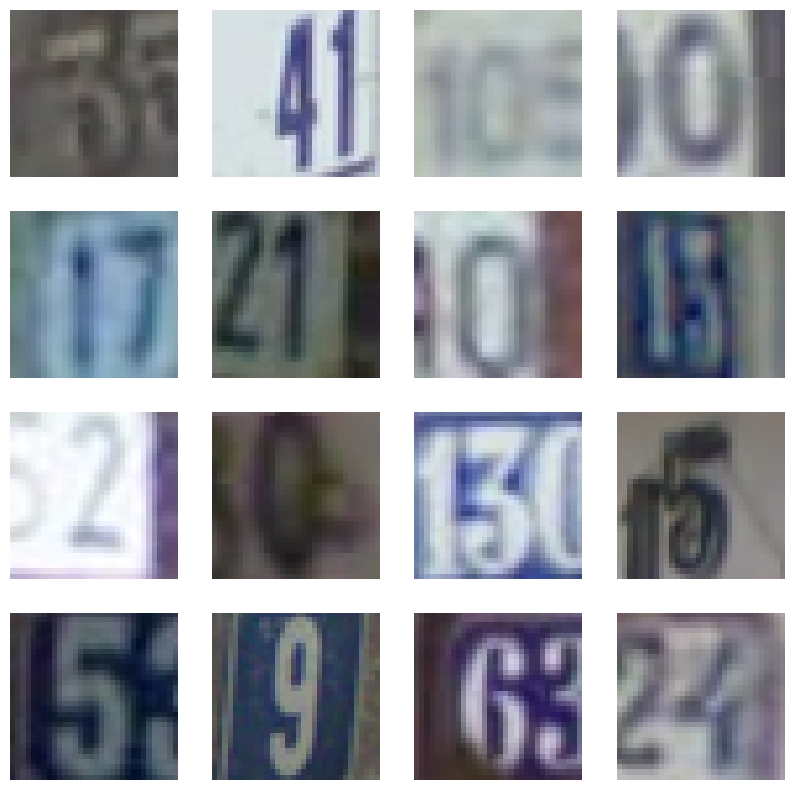

In [ ]:
# Display a grid of images
num_images = 16  # Adjust as needed
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].permute(1, 2, 0).numpy())  # Rearrange dimensions for imshow
    plt.axis('off')
plt.show()


# Architecture of Autoencooder

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(32*32*3, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 32*32*3),
            nn.Sigmoid())

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 32, 32)
        return x
model = Autoencoder()

# Defining optimizer and loss function

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model on training set

In [ ]:
num_epochs=20

total_step=num_epochs*batch_size
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Streaming output truncated to the last 5000 lines.
Epoch [15/25], Step [39/3200], Loss: 0.0077
Epoch [15/25], Step [40/3200], Loss: 0.0069
Epoch [15/25], Step [41/3200], Loss: 0.0071
Epoch [15/25], Step [42/3200], Loss: 0.0066
Epoch [15/25], Step [43/3200], Loss: 0.0069
Epoch [15/25], Step [44/3200], Loss: 0.0065
Epoch [15/25], Step [45/3200], Loss: 0.0067
Epoch [15/25], Step [46/3200], Loss: 0.0077
Epoch [15/25], Step [47/3200], Loss: 0.0075
Epoch [15/25], Step [48/3200], Loss: 0.0079
Epoch [15/25], Step [49/3200], Loss: 0.0068
Epoch [15/25], Step [50/3200], Loss: 0.0066
Epoch [15/25], Step [51/3200], Loss: 0.0066
Epoch [15/25], Step [52/3200], Loss: 0.0074
Epoch [15/25], Step [53/3200], Loss: 0.0068
Epoch [15/25], Step [54/3200], Loss: 0.0071
Epoch [15/25], Step [55/3200], Loss: 0.0074
Epoch [15/25], Step [56/3200], Loss: 0.0061
Epoch [15/25], Step [57/3200], Loss: 0.0072
Epoch [15/25], Step [58/3200], Loss: 0.0082
Epoch [15/25], Step [59/3200], Loss: 0.0071
Epoch [15/25], Step [60/3

# Training the model on Validation set

In [ ]:
num_epochs=20

total_step=num_epochs*batch_size
for epoch in range(num_epochs):
    for i, data in enumerate(val_loader):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [1/2560], Loss: 0.0064
Epoch [1/20], Step [2/2560], Loss: 0.0065
Epoch [1/20], Step [3/2560], Loss: 0.0065
Epoch [1/20], Step [4/2560], Loss: 0.0066
Epoch [1/20], Step [5/2560], Loss: 0.0066
Epoch [1/20], Step [6/2560], Loss: 0.0061
Epoch [1/20], Step [7/2560], Loss: 0.0058
Epoch [1/20], Step [8/2560], Loss: 0.0058
Epoch [1/20], Step [9/2560], Loss: 0.0061
Epoch [1/20], Step [10/2560], Loss: 0.0058
Epoch [1/20], Step [11/2560], Loss: 0.0065
Epoch [1/20], Step [12/2560], Loss: 0.0066
Epoch [1/20], Step [13/2560], Loss: 0.0058
Epoch [1/20], Step [14/2560], Loss: 0.0061
Epoch [1/20], Step [15/2560], Loss: 0.0060
Epoch [1/20], Step [16/2560], Loss: 0.0062
Epoch [1/20], Step [17/2560], Loss: 0.0058
Epoch [1/20], Step [18/2560], Loss: 0.0064
Epoch [1/20], Step [19/2560], Loss: 0.0061
Epoch [1/20], Step [20/2560], Loss: 0.0058
Epoch [1/20], Step [21/2560], Loss: 0.0061
Epoch [1/20], Step [22/2560], Loss: 0.0053
Epoch [1/20], Step [23/2560], Loss: 0.0058
Epoch [1/20], Step [

In [ ]:
test_examples = None

with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0].to(DEVICE)
        test_examples = batch_features.view(-1, 3072)
        reconstruction = model(test_examples)
        break

# Display of image before and after applying model

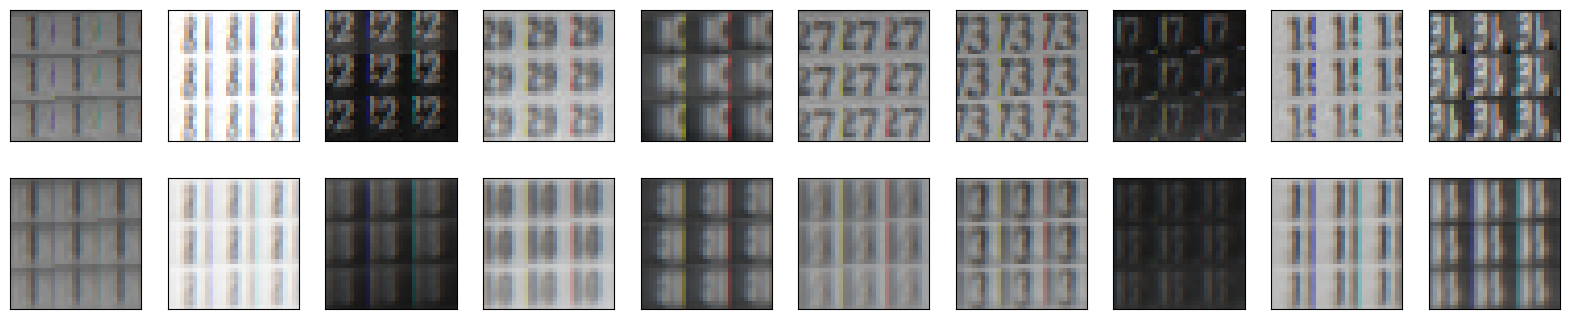

In [ ]:
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Structure of the model

In [ ]:
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=3072, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
pip install scikit-image


# Function to calculate SSIM and PSNR

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_ssim(img1, img2):
    return ssim(img1, img2, multichannel=True)

def calculate_psnr(img1, img2):
    return psnr(img1, img2)

# Calculating SSIM and PSNR

In [ ]:
total_ssim = 0
total_psnr = 0

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        for i in range(len(images)):
            ssim_val = ssim(images[i].numpy().transpose(1, 2, 0), outputs[i].numpy().transpose(1, 2, 0), multichannel=True)
            psnr_val = psnr(images[i].numpy().transpose(1, 2, 0), outputs[i].numpy().transpose(1, 2, 0))
            total_ssim += ssim_val
            total_psnr += psnr_val

avg_ssim = total_ssim / len(test_dataset)
avg_psnr = total_psnr / len(test_dataset)

print(f'Average SSIM: {avg_ssim:.4f}')
print(f'Average PSNR: {avg_psnr:.4f}')


<ipython-input-70-82b306b2e67e>:8: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(images[i].numpy().transpose(1, 2, 0), outputs[i].numpy().transpose(1, 2, 0), multichannel=True)


Average SSIM: 0.7652
Average PSNR: 23.6608


# Function to add noise in  the images

In [ ]:
def add_noise(images):
    noise = torch.randn_like(images) * 0.2  # Adjust noise level as needed
    noisy_images = images + noise
    return noisy_images

# Training the model on noisy images

In [ ]:
num_epochs = 20

num_epochs = 20

for epoch in range(num_epochs):
    for images, _ in train_loader:
        noisy_images = add_noise(images)
        optimizer.zero_grad()
        outputs = model(noisy_images)  # Pass noisy images as input
        loss = criterion(outputs, images)  # Target is still the clean images
        loss.backward()
        optimizer.step()

    # Print epoch and loss information
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/20], Loss: 0.0062
Epoch [2/20], Loss: 0.0050
Epoch [3/20], Loss: 0.0057
Epoch [4/20], Loss: 0.0059
Epoch [5/20], Loss: 0.0066
Epoch [6/20], Loss: 0.0052
Epoch [7/20], Loss: 0.0061
Epoch [8/20], Loss: 0.0056
Epoch [9/20], Loss: 0.0059
Epoch [10/20], Loss: 0.0057
Epoch [11/20], Loss: 0.0067
Epoch [12/20], Loss: 0.0055
Epoch [13/20], Loss: 0.0059
Epoch [14/20], Loss: 0.0058
Epoch [15/20], Loss: 0.0058
Epoch [16/20], Loss: 0.0058
Epoch [17/20], Loss: 0.0060
Epoch [18/20], Loss: 0.0060
Epoch [19/20], Loss: 0.0056
Epoch [20/20], Loss: 0.0053


In [ ]:
class NoisyDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        image, label = self.dataset[index]
        noisy_image = add_noise(image)
        return noisy_image, label  # Assuming you also need the labels

    def __len__(self):
        return len(self.dataset)

# Creating dataset and data loader for noisy images

In [ ]:
noisy_dataset = NoisyDataset(test_dataset)  # Wrap your existing dataset
noisy_dataloader = DataLoader(noisy_dataset, batch_size=64, shuffle=True)

# Calculating SSIM and PSNR after applying model on noisy dataset

In [ ]:
total_ssim = 0
total_psnr = 0

with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        for i in range(len(images)):
            ssim_val = ssim(images[i].numpy().transpose(1, 2, 0), outputs[i].numpy().transpose(1, 2, 0), multichannel=True)
            psnr_val = psnr(images[i].numpy().transpose(1, 2, 0), outputs[i].numpy().transpose(1, 2, 0))
            total_ssim += ssim_val
            total_psnr += psnr_val

avg_ssim = total_ssim / len(test_dataset)
avg_psnr = total_psnr / len(test_dataset)

print(f'Average SSIM: {avg_ssim:.4f}')
print(f'Average PSNR: {avg_psnr:.4f}')


<ipython-input-74-82b306b2e67e>:8: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(images[i].numpy().transpose(1, 2, 0), outputs[i].numpy().transpose(1, 2, 0), multichannel=True)


Average SSIM: 0.7699
Average PSNR: 23.7171


In [ ]:
test_examples = None

with torch.no_grad():
    for batch_features in noisy_dataloader:
        batch_features = batch_features[0].to(DEVICE)
        test_examples = batch_features.view(-1, 3072)
        reconstruction = model(test_examples)
        break

# Displaying noisy_images before and after applying model

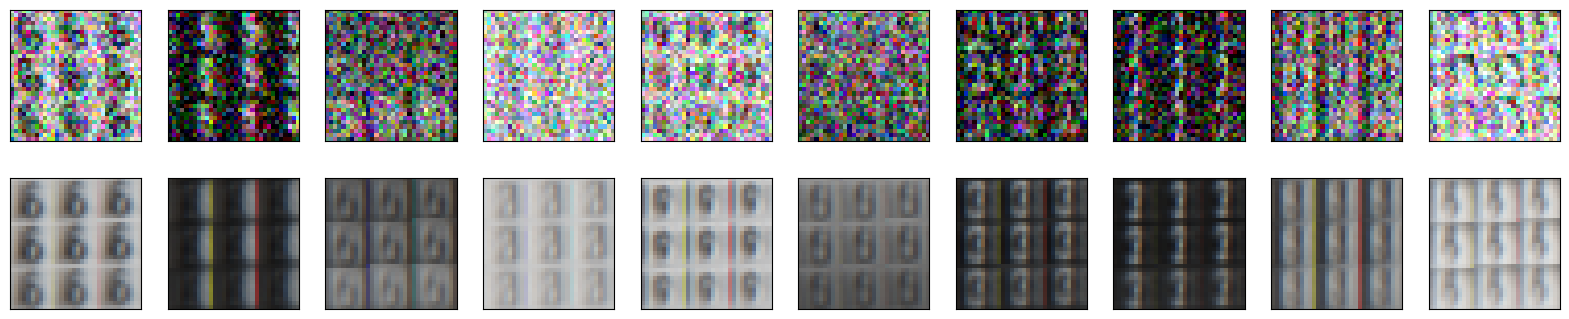

In [ ]:
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


The impact of denoising on the autoencoder's performance and reconstruction quality is multifaceted and depends on several factors:

# Positive impacts:


*  Improved noise removal: The denoising autoencoder explicitly learns to extract underlying patterns from noisy data, leading to cleaner and more accurate reconstructions of noisy inputs.
*   Improved noise removal: The denoising autoencoder explicitly learns to extract underlying patterns from noisy data, leading to cleaner and more accurate reconstructions of noisy inputs.


*  Enhanced robustness: Training with noise can make the model more robust to real-world data, which often contains inherent noise due to sensor limitations, compression, or environmental factors.
*   Feature learning: Denoising can force the autoencoder to focus on capturing essential features that are robust to noise, potentially leading to a more compact and representative latent space.

  
# Negative impacts:


*   Performance on clean data: While the denoising autoencoder excels on noisy inputs, it might slightly underperform on clean data compared to the basic autoencoder.
*   Overfitting to noise: If the noise level during training is too high or not diverse enough, the model might overfit and learn to simply remove specific noise patterns instead of focusing on the underlying signals.


*   Increased complexity: Denoising introduces additional training challenges like hyperparameter tuning for noise levels and potentially requiring larger networks or more sophisticated architectures.

Overall, the impact of denoising is context-dependent:


*   If clean data quality and performance are paramount, the basic autoencoder might be sufficient.
*   A hybrid approach, where denoising pre-processing is combined with a standard autoencoder, could be considered for both noise robustness and clean data fidelity.

# Denoising autoencoder is likely the better choice.
